## Meeting with Mike! 27/11/24

Its alot of graphs...

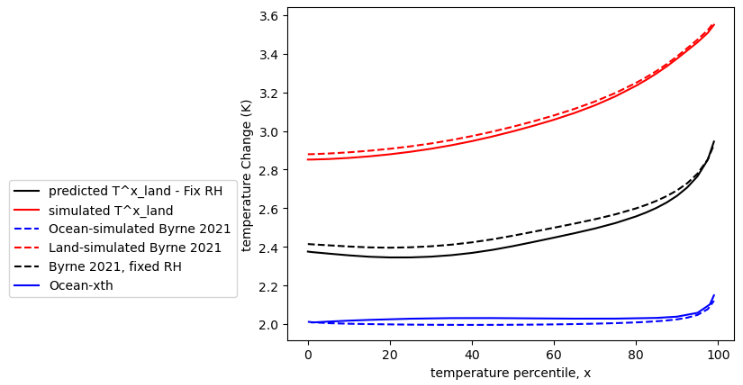

#### This is looking at the area weighted mean of gamma vs the simulated temperature change

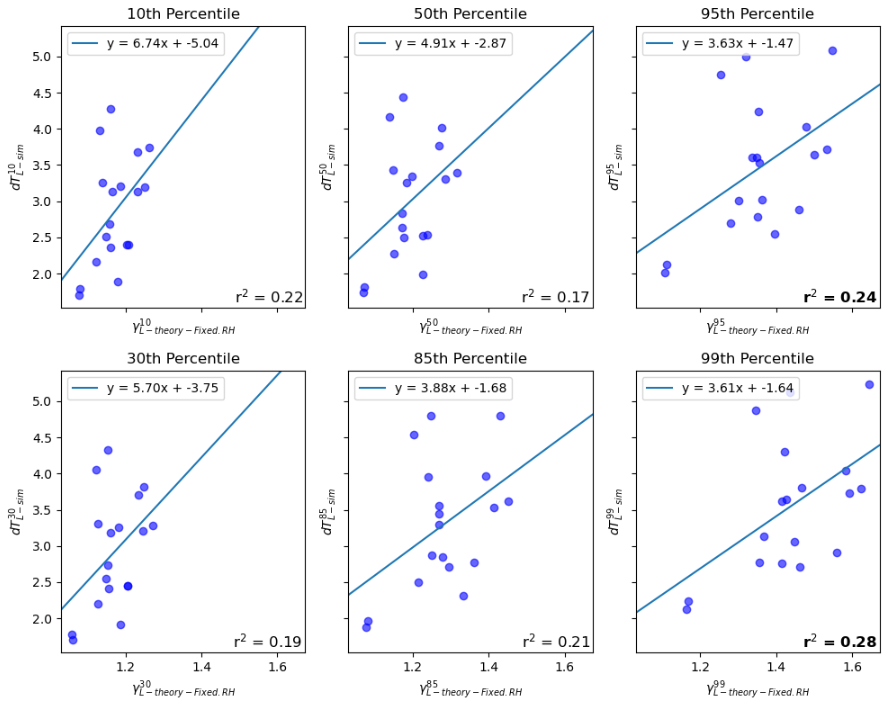
---
#### We can plot this correlation... 

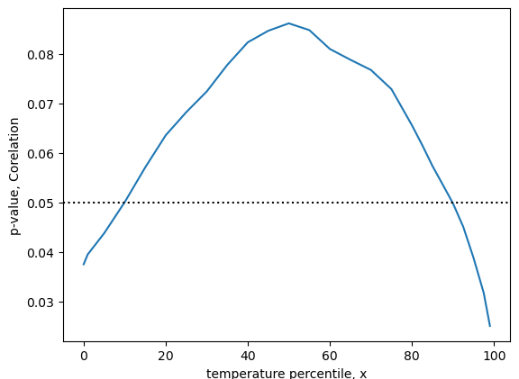

Looks like you can find a significant correlation for the highest temperatures and also some of the lowest ones...

This is the p-value core the correlations between area weighted mean of gamma vs simulated temp change

---


### Comparing this to the contribution of $\delta T_O$

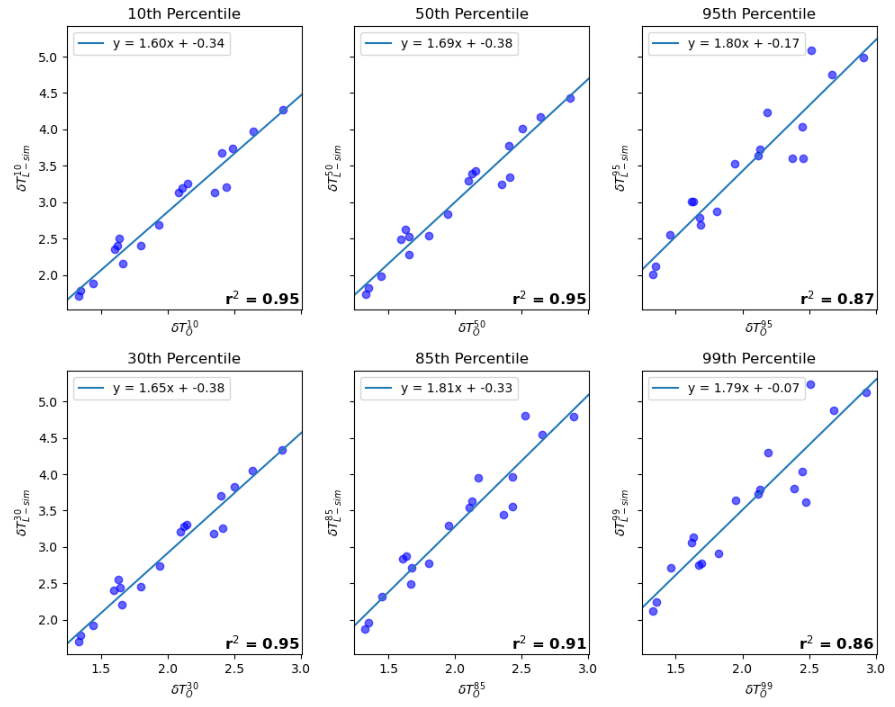

We can see that this is definatly the dominant component

---
#### If you do this but treat each individual latitude as a point - calculate gamma and see how well it predicts delta T x

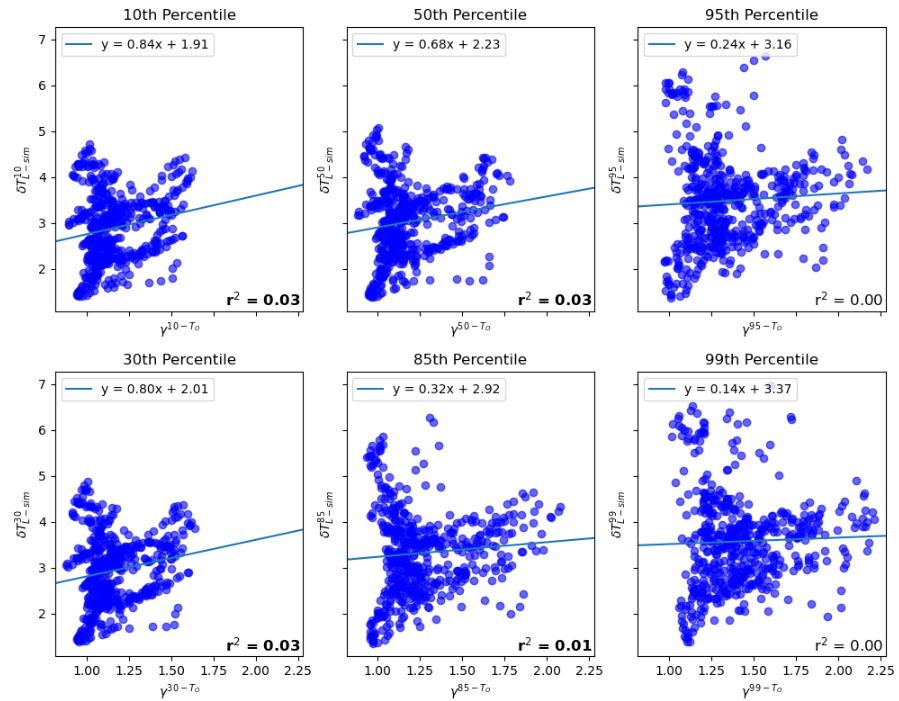

Why am I getting significant p values with very low correlations

^^^ p value for correlations here

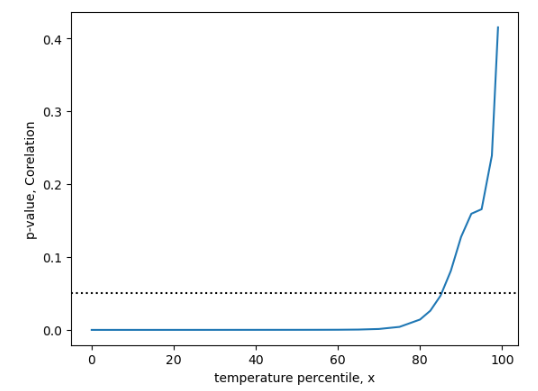

Similarly you can look at the ocean temp contribution... its alot better

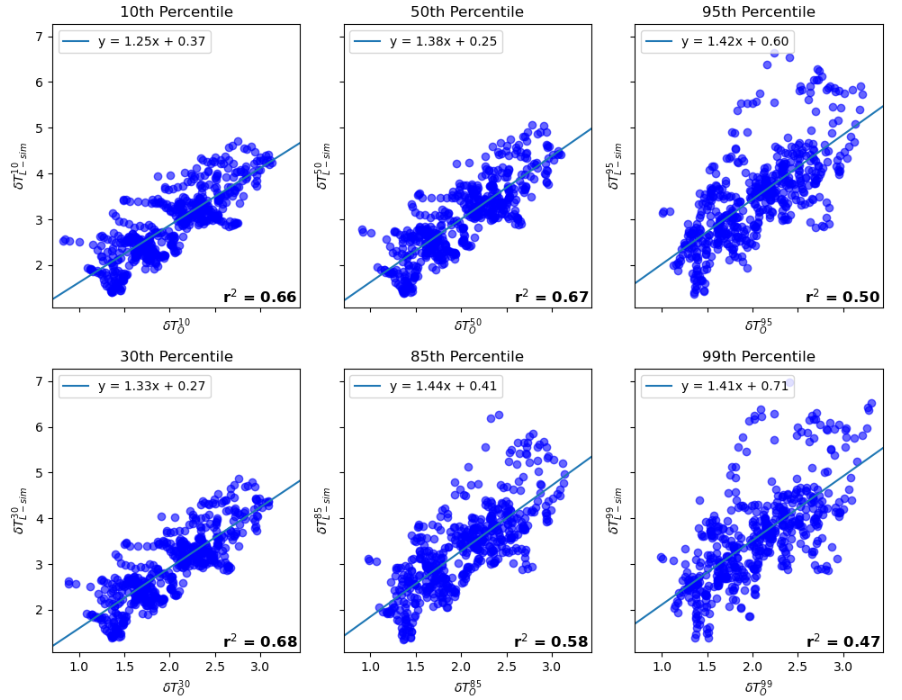



---
### To summarize - we don't really have legs to stand on for using gamma to dirrectly predict 

So one thing that we thought we could try is to do $\dfrac{\delta T_L^x}{\delta T_O}$ vs $\gamma ^{T_O}$

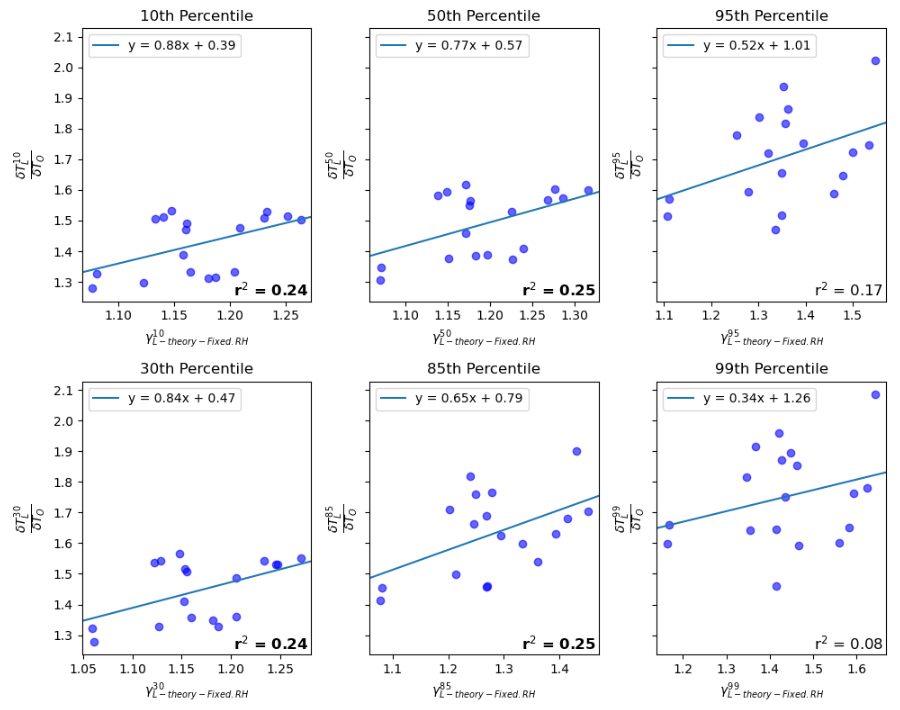

Note that here we let the x axis float

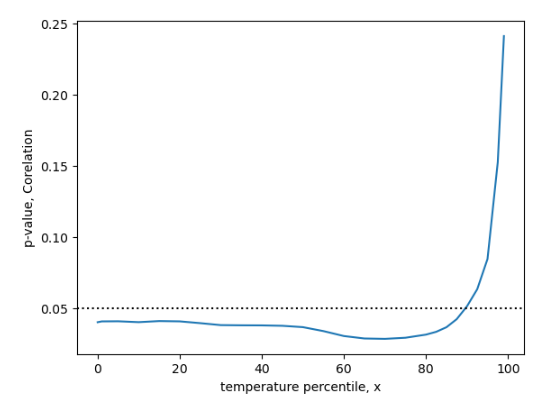

###### These are the p values for the correlations between $\dfrac{\delta T_L^x}{\delta T_O}$ vs $\gamma ^{T_O}$


###### We can do this seprately for each latitude:

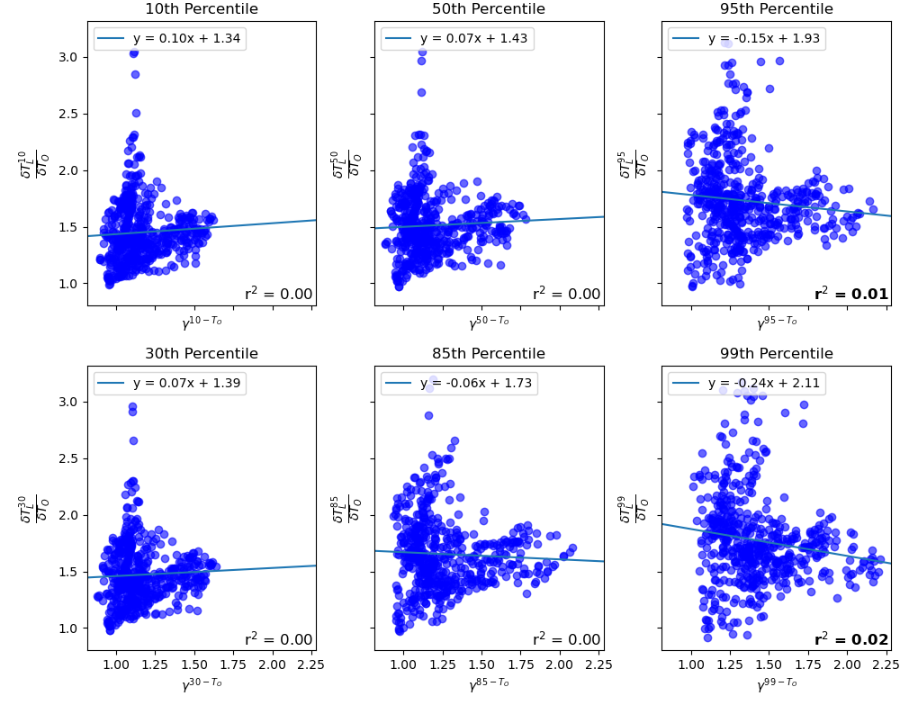

--- 
## Working towards doing this grid cell by grid cell
- Basically the method using percentile of score - where you basically sort all values and then rank them took forever and destroyed the RAM
- It worked well enough to do it by lat band but not by grid cell
- To combat this I'm trying to deal with the distribution as a pdf of MSE values so that finding the corresponding px value can be computed from the cumulative distribution function

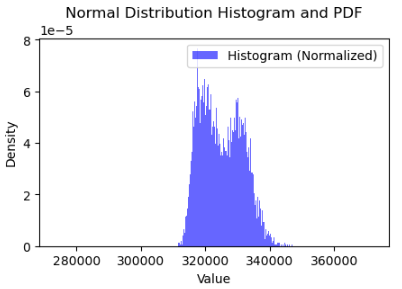

- This is done basically by creating a set of bins for all MSE values (I dont think you need to standardize over models but is helpful to standardize within a model)
- You generate a pdf using np.histogram to get the probability of MSE falling in any one bin then generate a cumulative distribution function

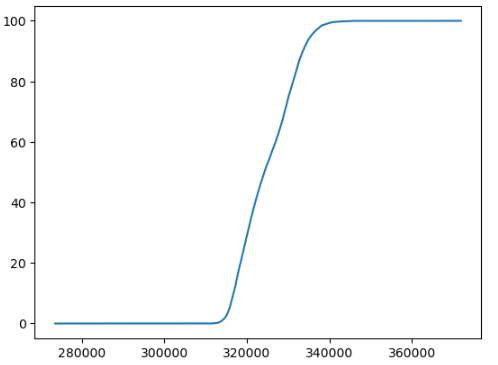

- Y axis is cdf *100 and x is values of MSE

Then for a given score (in our case the mean MSE for days over land where temperature exceeds a given percentile of temperature) we can figure out the related percentile of MSE for that day - (with some linear interpolation)
- This px is then used to calculate the ocean variables...

### So the question we can ask here is are there regions where gamma can predict dT_x_l?
- we will hold the dTo term by latitude still bc obviously there aren't corresponding Ocean grid cells

---
## Things for next time...
- More models - which ones - can we use different ensamble members?
- dpx - i need to see how that holds up using the new method - so far from testing I think this method above systematically over estimates px so maybe its something in there?
- Functionalize the method above and use it on grid cell specific analysis

---
- Use 4xCO2 simulations to boost signal-to-noise
- Try version of the theory with mean land temperature as reference, rather than ocean temperature 
- Try removing seasonal cycle

---
## Plan going foreward:
In decreasing order of priority:
##### Using $\delta T_{global}$ to constrain $\delta T_L^x$ - with existing imegent constraints

The idea here is that there is a host of research looking into constraining global temperatures from the ECS people...
- We also know that becasue of the observed connections between $\delta T_O$  its reasonable to assume that $\delta T_{global}$ is probably also well correlated

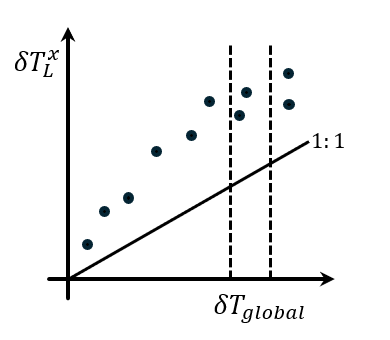

Check out sherwood for potential constraints

##### Removing the seasonal cycle to look at temperature anomalies
- This would be a different metric but would move the analysis away from purely looking at hot summer temps

##### Looking at abrupt4xCO2
- The idea here is to use as Mike put it - a bigger hammer to reduce the noise vs signal
- Here we'd look at the last 20 years of the abrupt4xCO2 vs 20 years of the PiControl simulations
- 4xCO2 are branched off the PiControl - Pi is preindustrial

##### A slightly different theory for extreme temperature response:
We have primarily been focused on a branch of the theory that says $\delta h_L \approx \delta h_O$ ie that changes in moist static energy are equal over land and ocean

However, part of the theory that Josh has been more concerned with is that $\delta h_L^x \approx \overline{h_L}$ ie that the distribution of MSE essentially just shifts to the right with a change in temperature

Taking this theory through some steps: 

$\delta h_L^x \approx \overline{h_L} \qquad \Rightarrow  \qquad  c_p \delta T_L^x + L_v \delta q_L^x \approx c_p \delta \overline{T_L} + L_v \delta \overline{q_L}$

$r_L^x = \dfrac{q^x_L}{q^{*x}} \qquad  \Rightarrow \qquad \dfrac{\delta q_L^x}{q_L^x} = \dfrac{\delta q_L^{*x}}{q^{*x}_L} + \dfrac{\delta r_L^x}{r^x_L} \qquad$   However... we can neglect the final relative humidity term here for constant relative humidity

$= \alpha_L^x \delta T_L^x \qquad \Rightarrow \qquad \delta q_L^x = q_L^x \alpha_L^x \delta T_L^x \qquad$ This gives us an expression for $\delta q_L^x $ that we can pop into $c_p \delta T_L^x + L_v \delta q_L^x \approx c_p \delta \overline{T_L} + L_v \delta \overline{q_L}$


Then we have a similar form taking shape...

$\delta T_L^x [ c_p + L_v q_L^x \alpha_L^x ] = \delta \overline{T_L} [ c_p + L_v \overline{q_L^x} \overline{\alpha_L^x} ] $

$= \dfrac{\delta T_L^x}{\delta \overline{T_L}} = \dfrac{c_p + L_v \overline{q}_L \overline{\alpha}_L}{c_p + L_v q_L^x \alpha_L^x} = $ The scaling factor of land temperature at percentile x

The idea is that you would try all the same stuff as we tried before to come up with some good correlations 

##### Most important - continuing to chug along on doing the grid cell specific analysis
- The hope from this is that we could catigorize regions into having predictable vs not so predictable responses via gamma parameter